In [14]:
# There is a dependency conflict between TensorFlow and NumPy, in that the latest version of NumPy 2.0++ conflicts
# with the latest version of TensorFlow. You need to downgrade the NumPy to 1.0++ since TensorFlow only works with 
# NumPy 1.0++.
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Studying the digits image dataset from TensorFlow/Keras library

60000
60000
10000
10000
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  

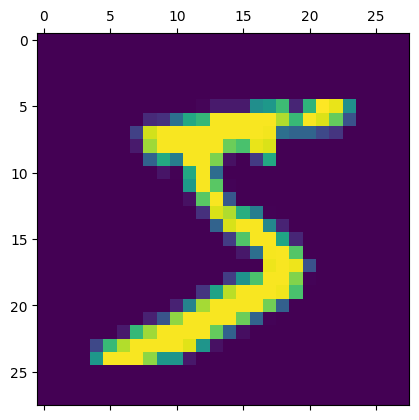

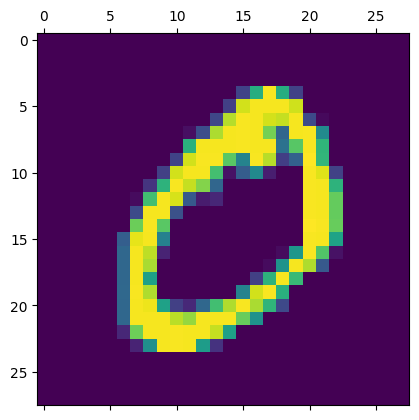

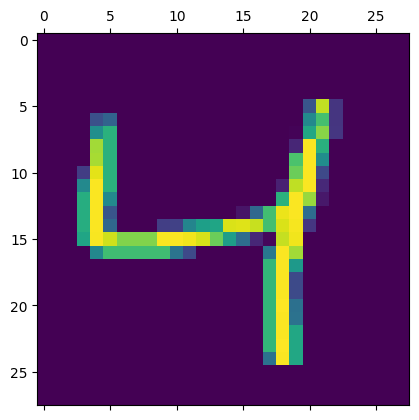

In [15]:
# Uploading the MNIST dataset, which contains images of handwritten digits (0–9), and splits it into training and 
# testing sets.
# Part                   | Meaning                                                                                
# `keras.datasets.mnist` | Built-in dataset in Keras containing 70,000 grayscale 28×28 digit images               
# `.load_data()`         | Loads the data and returns **two tuples**: `(x_train, y_train)` and `(x_test, y_test)`
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

print(x_train[0].shape)

print(x_train[0])
print(x_train[1])
print(x_train[2])
plt.matshow(x_train[0])
plt.matshow(x_train[1])
plt.matshow(x_train[2])

print(y_train[0])
print(y_train[1])
print(y_train[2])

## Data Preprocessing

### Scaling of the input data
In ML and DL, commonly you will need to scale your input data to improve accuracy of ML algorithms and Neural Networks.

**What is scaling?**  
Scaling, in the context of ML and DL, refers to the process of transforming the numerical features of a dataset (input data) into a standardised range. 

It involves bringing all the features to a similar scale, so that no single feature dominates the ML algorithm or Neural Network. By scaling the features, we can ensure that they contribute equally to the ML or DL model’s performance.

There are 2 types of scaling techniques:
1. **Normalization** - (aka min-max scaling), transforms the features to a range between 0 and 1. It subtracts the minimum value of the feature and divides it by the range (maximum value minus minimum value). 

    This technique is suitable when the distribution of the data does not follow a Gaussian distribution.

2. **Standardization** - transforms the features to have a mean of 0 and a standard deviation of 1. It subtracts the mean of the feature and divides it by the standard deviation.

    This technique is preferable when the data is normally distributed or when we don’t know the distribution in advance. Standardization maintains the shape of the distribution and does not bound the features to a specific range.

<br>

| Feature                 | **Standardisation (Z-score scaling)**                                                      | **Normalisation (Min-Max scaling)**                                |
|-------------------------|---------------------------------------------------------------------------------------------|---------------------------------------------------------------------|
| 🔢 Formula              | $z = \frac{x - \mu}{\sigma}$                                                               | $x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$  |
| 📈 Output Range         | Mean = 0, Std = 1 (not bounded)                                                            | Range \[0, 1] (or sometimes \[-1, 1])                              |
| 📦 Use Case             | Most common in **deep learning**, especially for features with Gaussian (Normal)-like distributions | Good when **bounded inputs** are needed (e.g., image pixel values) |
| 🧠 Preferred for        | **Neural networks**, PCA, most ML models                                                   | Input layers, image data, distance-based models (KNN, SVM)         |
| 📉 Affected by outliers | Less sensitive (but still can be affected)                                                 | Very sensitive to outliers                                         |
| 📌 Example              | $x = 100, \mu = 60, \sigma = 20 \Rightarrow z = 2$                                         | $x = 100, x_{\min}=0, x_{\max}=200 \Rightarrow x'=0.5$             |

<br>

Source(s):
- https://medium.com/@shivanipickl/what-is-feature-scaling-and-why-does-machine-learning-need-it-104eedebb1c9 (Medium)

In [ ]:
# Scaling by normalization:
# - Since the 'pixel number' feature is not between 0 to 1 range, we need to normalize it: 
#   -> Max value (pixel number) is 100, min value (pixel number) is 0
x_train = (x_train - 0) / (255 - 0)
x_test = (x_test - 0) / (255 - 0)

print(x_train[0])
print(x_train[1])

print(x_test[0])
print(x_test[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Flattening the each of the data image in the data image dataset from a 2D array to 1D array

In [17]:
# Initially the shape of the 'x_train' and 'x_test' is (60000, 28, 28) and (10000, 28, 28) respectively, which means there 
# are 60,000 or 10,000 training images respectively, all images which will be in a 2D array
print(x_train.shape)
print(x_test.shape)

# We need to reshape 'x_train' and 'x_test' to 60,000 or 10,000 training images respectively, all images which will be in a 
# 1D array (60000, 784) (784, because 24 * 24 = 784) and (10000, 784) respectively, which means there are 60,000 or 10,000 
# training images respectively, all images which will be in a 1D array
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)
print(x_train_flattened.shape)
print(x_test_flattened.shape)

print(x_train_flattened[0])
print(x_test_flattened[0])

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0

## Creating and Training a simple Feedforward Neural Network (FNN) with 2 layers
The 2 layers are the input layer and output layer, with no hidden layers.

In [ ]:
# '.Sequential' function is essentially a Stack Data Structure, specifically a Stack of Neural Network layers, which
# you can add however many Neural Network layers into the Stack Data Structure as you wish

# Basic syntax of the '.Dense' function (which means a 'Dense' Neural Network with a neuron from a layer connecting to all 
# other neurons in the previous layer):
#       tf.keras.layers.Dense(
#           units,
#           activation=None,
#           use_bias=True,
#           kernel_initializer='glorot_uniform',
#           bias_initializer='zeros',
#           kernel_regularizer=None,
#           bias_regularizer=None,
#           activity_regularizer=None,
#           kernel_constraint=None,
#           bias_constraint=None,
#           lora_rank=None,
#           **kwargs
#       )

# 3 of the more important parameters are:
# - units - states the number of neurons in the layer
# - input_shape - tells the layer to expect input vectors of a particular shape
# - activation - states the activation function to be used, some of the supported activation functions are:
#                -> 'relu'
#                -> 'sigmoid'
#                -> 'tanh'
#                -> 'softmax'
#                -> etc.

# Source:
# - https://www.geeksforgeeks.org/tf-keras-layers-dense-fully-connected-layer-in-tensorflow/ (GeekforGeeks)


# Here, we will simply just try with the 'sigmoid' activation function. It is up to you to play around with the different 
# types of hyper-parameters, to see which oens give you a model of the highest accuracy.

# We are using 10 neurons in the output layer because there are 10 possible outputs, the digits 0 to 9. The 'input_shape'
# is 784 pixels as the possible inputs, hence there will be 784 neurons at the input layer.
simple_feedforward_neural_network_DL_model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])



# Basic syntax of the 'compile()' function:
#       compile(
#           optimizer='rmsprop',
#           loss=None,
#           loss_weights=None,
#           metrics=None,
#           weighted_metrics=None,
#           run_eagerly=False,
#           steps_per_execution=1,
#           jit_compile='auto',
#           auto_scale_loss=True
#       )

# 3 of the more important parameters are:
# - optimizer - states the optimizer to be used, some of the supported optimizers are:
#               -> 'sgd' – basic stochastic gradient descent
#               -> 'adam' – adaptive optimizer (widely used default)
#               -> 'rmsprop' – good for RNNs and unstable gradients
#               -> 'adagrad' – adapts learning rates per parameter
#               -> 'adadelta' – stable version of Adagrad
#               -> 'adamax' – Adam variant using infinite norm
#               -> 'nadam' – Adam with Nesterov momentum

# - loss - states the loss function to be used, some of the supported loss functions are:
#          -> 'binary_crossentropy' – for binary classification
#          -> 'categorical_crossentropy' – for multi-class classification (with one-hot labels)
#          -> 'sparse_categorical_crossentropy' – for multi-class classification (with integer labels)
#          -> 'mean_squared_error / mse' – for regression problems (squared loss)
#          -> 'mean_absolute_error / mae' – for regression problems (absolute loss)
#          -> 'huber_loss' – for regression with outliers
#          -> 'kl_divergence' – for comparing probability distributions (e.g., VAEs)
#          -> 'cosine_similarity' – for comparing angle between vectors (e.g., embeddings)
#          -> 'poisson' – for modeling count data (e.g., events per time)

# - metrics - states the list of metrics to be evaluated by the Neural Network model during training and testing, 
#             some of the supported metrics are:
#             -> 'accuracy' – for general classification
#             -> 'binary_accuracy' – for binary classification
#             -> 'categorical_accuracy' – for multi-class with one-hot labels
#             -> 'sparse_categorical_accuracy' – for multi-class with integer labels
#             -> 'mae' / MeanAbsoluteError' – for regression (mean absolute error)
#             -> 'mse' / MeanSquaredError' – for regression (mean squared error)
#             -> 'AUC' – for ROC curve analysis in binary classification
#             -> 'Precision' – for evaluating positive prediction accuracy
#             -> 'Recall' – for evaluating true positive coverage
#             -> 'TopKCategoricalAccuracy' – for Top-K classification (e.g., Top-5 accuracy)

# Source:
# - https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile (TensorFlow)

# Here, we will simply just try with the 'adam' optimizer. 'sparse_categorical_crossentropy' loss function and
# 'accuracy' metrics. It is up to you to play around with the different types of hyper-parameters, to see which oens
# give you a model of the highest accuracy.
simple_feedforward_neural_network_DL_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



# Train the simple Neural Network
# What does 'epochs=5' mean?
# - An epoch is one complete pass through the entire training dataset.
# - So epochs=5 means the model will loop over the entire training data 5 times during training.
simple_feedforward_neural_network_DL_model.fit(x_train_flattened, y_train, epochs=5)

# What does this output mean?
# Epoch 1/5
# 1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8101 - loss: 0.7306
# Epoch 2/5
# 1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9154 - loss: 0.3093
# Epoch 3/5
# 1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9208 - loss: 0.2867
# Epoch 4/5
# 1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9241 - loss: 0.2707
# Epoch 5/5
# 1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9261 - loss: 0.2654

# This means the accuracy is good, of about 90% accuracy on average.

# (Note: this training was done without the scaling of input data in the data preprocessing step, and it led to a very 
# low accuracy of about 30%. Hence, there it emphasises the need for scaling of input data.)

c:\Users\Jet Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8101 - loss: 0.7306
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9154 - loss: 0.3093
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9208 - loss: 0.2867
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9241 - loss: 0.2707
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9261 - loss: 0.2654


## Predicting with the trained simple Feedforward Neural Network (FNN) model

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step
[3.1310391e-02 4.4540607e-07 6.7927822e-02 9.5025021e-01 1.6983900e-03
 1.4025484e-01 2.0362188e-06 9.9978566e-01 8.6932048e-02 5.6203800e-01]
7
[7, 2, 1, 0, 4]
[7 2 1 0 4]


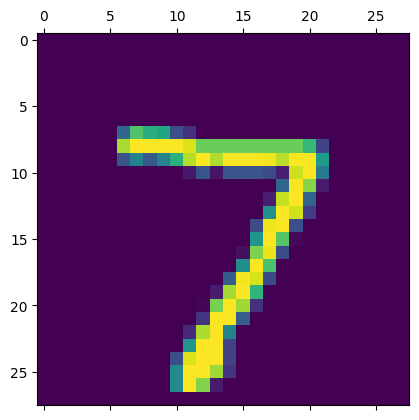

In [ ]:
plt.matshow(x_test[0])

y_predicted = simple_feedforward_neural_network_DL_model.predict(x_test_flattened)
print(y_predicted[0])

# What does the output mean?
# [1.6401831e-02 6.0232810e-07 9.4450109e-02 9.6756643e-01 3.8448770e-03
#  1.3391142e-01 1.7453985e-06 9.9976486e-01 1.3328448e-01 7.0881343e-01]

# These are the probabilities for each digit (0–9). For example:
# Digit | Probability | Interpretation                      
# ----- | ----------- | ----------------------------------- 
# 0     | 0.0164      | Low chance                          
# 1     | 0.0000006   | Extremely unlikely                  
# 2     | 0.0945      | Moderate chance                     
# 3     | 0.9676      | Very confident this is the digit  
# 4     | 0.0038      | Very low chance                     
# 5     | 0.1339      | Possibly confused with 3            
# 6     | 0.0000017   | Extremely unlikely                  
# 7     | 0.9998      | Very confident this is the digit  
# 8     | 0.1333      | Moderate, but not top guess         
# 9     | 0.7088      | Very confident this is the digit  

# We then take the digit with the highest probability as the predicted output, which is 7 in
# this case


print(np.argmax(y_predicted[0]))

# Comparing predicted outputs by the simple Neural Network model with the actual y-values ('y_test') of the training 
# dataset
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels[:5])
print(y_test[:5])

## Evaluating the trained simple Feedforward Neural Network (FNN) model

### Using 'evaluate' function

In [ ]:
simple_feedforward_neural_network_DL_model.evaluate(x_test_flattened, y_test)

# What does the output mean?
# | Output Index | Value  | Meaning                                                                                                                                                      |
# | [0]          | 0.2667 | Loss on the test data (how far predictions are from true labels, using the 
# |              |        | loss function you specified — in this case `sparse_categorical_crossentropy`)
# | [1]          | 0.9261 | Accuracy (from `metrics=['accuracy']`) — meaning 92.61% of the predictions on 
# |              |        | the test data were correct 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9152 - loss: 0.3060


[0.2708876430988312, 0.9254000186920166]

### Using Confusion Matrix

In [21]:
# Use Confusion Matrix made entirely with TensorFlow, but has no nice visualisation
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
print(cm)

tf.Tensor(
[[ 962    0    0    1    0    6    6    4    1    0]
 [   0 1116    3    2    0    1    4    2    7    0]
 [   8   10  920   14    8    6   13   11   40    2]
 [   5    0   21  896    0   45    2   14   21    6]
 [   1    2    2    1  917    0   12    4   11   32]
 [  10    2    2   16    7  810   12    5   25    3]
 [  11    3    3    1    7   22  907    2    2    0]
 [   2    7   21    4    5    1    0  966    4   18]
 [  10   12    5   16    9   36    9   13  859    5]
 [  11    7    1    8   28   13    0   34    6  901]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

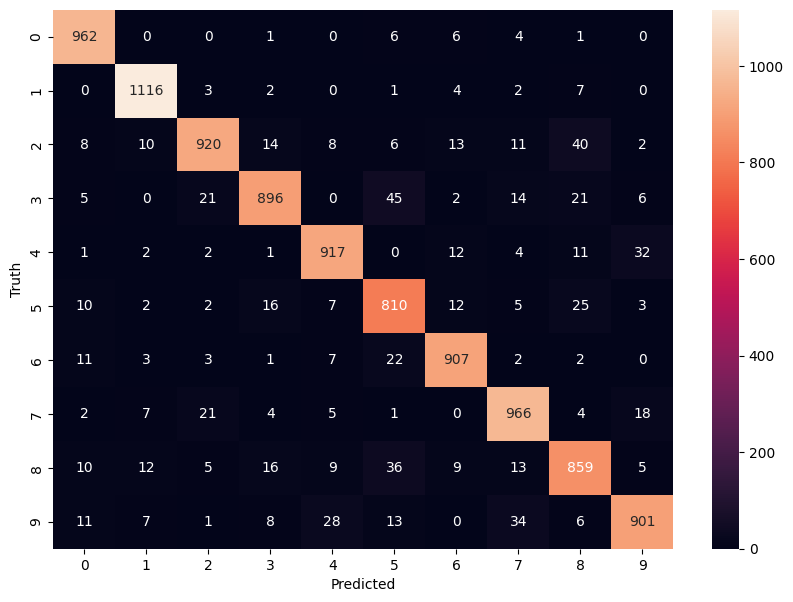

In [22]:
# Hence, use Confusion Matrix made with Seaborn instead, has nicer visualisation
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Adding hidden layers into the simple Feedforward Neural Network (FNN)

Generally adding more hidden layers into a Neural Network helps to improve performance of the model. But you need to be careful of the danger of overfitting, which happens if you add too many hidden layers.

In [ ]:
# Here, we will simply just try with the 'adam' optimizer. 'sparse_categorical_crossentropy' loss function and
# 'accuracy' metrics. It is up to you to play around with the different types of hyper-parameters, to see which oens
# give you a model of the highest accuracy.

# We are using 10 neurons in the output layer because there are 10 possible outputs, the digits 0 to 9. The 'input_shape'
# is 784 pixels as the possible inputs, hence there will be 784 neurons at the input layer.

# Adding 1 hidden layer here, and the output layer now no longer requires the 'input_shape' parameter, since TensorFlow
# figures that out for you based on the immediate next inner hidden layer.
simple_feedforward_neural_network_DL_model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784, ), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Here, we will simply just try with the 'adam' optimizer. 'sparse_categorical_crossentropy' loss function and
# 'accuracy' metrics. It is up to you to play around with the different types of hyper-parameters, to see which oens
# give you a model of the highest accuracy.
simple_feedforward_neural_network_DL_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

simple_feedforward_neural_network_DL_model.fit(x_train_flattened, y_train, epochs=5)


# This 3 layer simple Neural Network is more accurate than the simple Neural Network with only 2 layers (input layer
# and output layer).
# Epoch 1/5
# 1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8774 - loss: 0.4413
# Epoch 2/5
# 1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9606 - loss: 0.1340
# Epoch 3/5
# 1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9742 - loss: 0.0889
# Epoch 4/5
# 1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9809 - loss: 0.0645
# Epoch 5/5
# 1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9842 - loss: 0.0518



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8774 - loss: 0.4413
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9606 - loss: 0.1340
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9742 - loss: 0.0889
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9809 - loss: 0.0645
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9842 - loss: 0.0518
